In [1]:
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import os
from tqdm.notebook import tqdm
from time import time
import h5py
import numpy as np

In [2]:

results_dir = 'results/'

def read_file(filename):
    import pandas as pd
    import h5py

    try:
        with h5py.File(filename, 'r') as f:
            return (pd.concat((pd.DataFrame(f[k][:]) for k in (f.keys()) )))
    except:
        return None
try:
    from p_tqdm import p_umap
    results = p_umap(read_file, [results_dir+filename for filename in list(os.listdir(results_dir)) if '_tmp' not in filename ])
except:
    results = (map(read_file, [results_dir+filename for filename in tqdm(list(os.listdir(results_dir))) if '_tmp' not in filename ]))


  0%|          | 0/201 [00:00<?, ?it/s]

In [3]:
df = pd.concat([r for r in tqdm(results) if r is not None])
df['algorithm'] = df['algorithm'].str.decode("utf-8")
df = df.query("algorithm!='Expertise Tree'").copy()
df.algorithm = df.algorithm.str.replace(" (prune)","",regex=False)
df.algorithm = df.algorithm.str.replace("Neighbor ","",regex=False)
df.algorithm = df.algorithm.str.replace(".0%","%",regex=False)
df['bandit_type'] = df['bandit_type'].str.decode("utf-8")
df['smooth'] = df['smooth'].str.decode("utf-8")
df = df[~df.algorithm.str.contains("expert")]
df = df.rename(columns={"expert_context_dimensions": "g"})
df['regret']=0
df =df.reset_index()
for alg in df.algorithm.unique():
    df.loc[df.algorithm==alg,'regret'] = df[df.algorithm=='Oracle'].performance.values - df[df.algorithm==alg].performance.values
    df.loc[df.algorithm==alg,'relative time'] = df[df.algorithm==alg].time.values/df[df.algorithm=='Meta-CMAB'].time.values  
print(df.shape)

  0%|          | 0/201 [00:00<?, ?it/s]

(247770, 19)


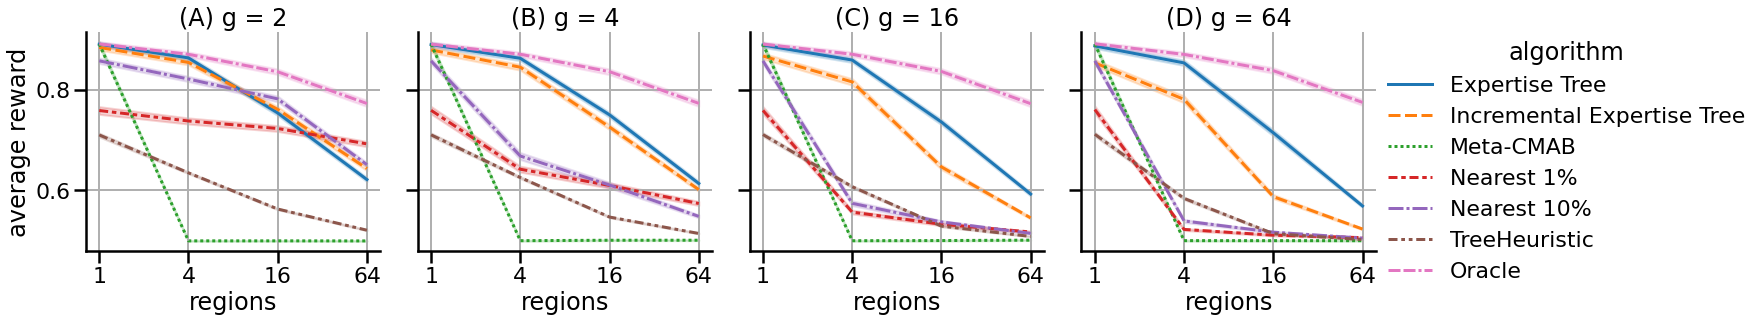

In [4]:
sns.set_context('poster')
subdf =df
subdf['regions']=subdf['n_regions']

exclude=["optimal","random"]
g=sns.relplot(data=subdf.query("algorithm not in @exclude"),col='g',y='performance',x='regions',style='algorithm',kind='line',hue='algorithm',style_order=["Expertise Tree","Incremental Expertise Tree","Meta-CMAB","Nearest 1%","Nearest 10%","TreeHeuristic","Oracle"],hue_order=["Expertise Tree","Incremental Expertise Tree","Meta-CMAB","Nearest 1%","Nearest 10%","TreeHeuristic","Oracle"])
idx=0
keys='ABCDEFGHIJKLMNOPQRSTUVWXYZ'
for ax in g.axes:
    for sax in ax:
        sax.set_title('('+keys[idx]+') '+sax.get_title())
        sax.grid()
        sax.set_xscale('log')
        sax.set_xticks(subdf['regions'].unique())
        sax.set_xticklabels(subdf['regions'].unique())
        sax.minorticks_off()
        sax.set_ylabel('average reward')
        idx+=1
plt.savefig("performance_region.pdf",bbox_inches='tight')
plt.show()

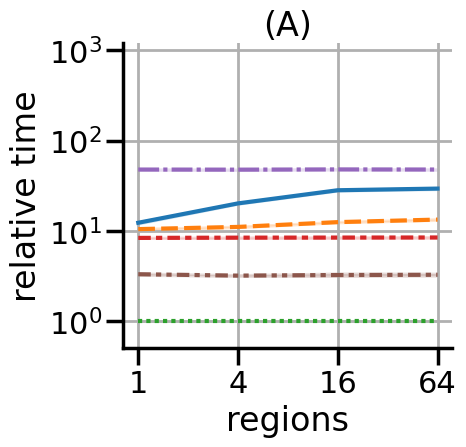

In [5]:
sns.set_context('poster')
valid_algorithms = ['Meta-CMAB','Nearest Neighbor 1.0%','Nearest Neighbor 10.0%','ET_0_none_MetaCMAB_2', 'IET_p_1_simple_MetaCMAB_10','IET_p_1_simple_MetaCMAB_2','TreeHeuristic','Oracle','random','optimal']
subdf =df
subdf['regions']=subdf['n_regions']
alg_order=["Expertise Tree","Incremental Expertise Tree","Meta-CMAB","Nearest 1%","Nearest 10%","TreeHeuristic",]

g=sns.relplot(data=subdf.query("g==2").query("algorithm not in @exclude and algorithm!='Oracle'"),y='relative time',row='shape',x='regions',style='algorithm',kind='line',hue='algorithm',legend=False,hue_order=alg_order,style_order=alg_order)
idx=0
keys='ABCDEFGHIJKLMNOPQRSTUVWXYZ'
for ax in g.axes:
    for sax in ax:
        sax.set_title('(A)')
        sax.set_ylim(.5,1200)
        sax.grid()
        sax.set_xscale('log')
        sax.set_yscale('log')
        sax.set_xticks(subdf['regions'].unique())
        sax.set_xticklabels(subdf['regions'].unique())
        sax.set_yticks([1,10,100,1000])
        sax.minorticks_off()
        idx+=1
plt.savefig("elapsed_region.pdf",bbox_inches="tight")
plt.show()

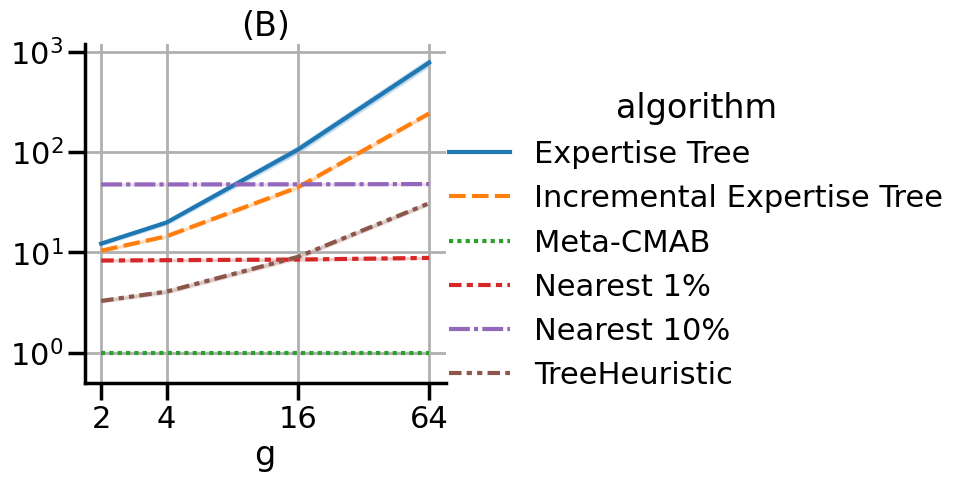

In [7]:
sns.set_context('poster')
valid_algorithms = ['Meta-CMAB','Nearest Neighbor 1.0%','Nearest Neighbor 10.0%','ET_0_none_MetaCMAB_2', 'IET_p_1_simple_MetaCMAB_10','IET_p_1_simple_MetaCMAB_2','TreeHeuristic','Oracle','random','optimal']
subdf =df
subdf['regions']=subdf['n_regions']

g=sns.relplot(data=subdf.query("regions==1").query("algorithm not in @exclude and algorithm!='Oracle'"),y='relative time',x='g',style='algorithm',kind='line',hue='algorithm',
                aspect=1.3,hue_order=alg_order,style_order=alg_order)
idx=0
keys='ABCDEFGHIJKLMNOPQRSTUVWXYZ'
for ax in g.axes:
    for sax in ax:
        sax.set_title('(B)')
      
        sax.set_ylim(.5,1200)
        sax.grid()
        
        sax.set_xscale('log')
        sax.set_yscale('log')
        sax.set_xticks(subdf['g'].unique())
        sax.set_xticklabels(subdf['g'].unique())
        sax.minorticks_off()
        sax.set_ylabel(None)
        idx+=1
plt.savefig("elapsed_g.pdf",bbox_inches="tight")
plt.show()